# Importy

In [1]:
import pandas as pd
from IPython.display import display

# APICommunication
import APICommunication.config as cfg

# Data
from Data.DataLoader import *
from Data.DataCleaner import *

# MarkowitzAnalysis
from MarkowitzAnalysis.ReturnAnalysis import *

# PortfolioAnalysis
from PortfolioAnalysis.PortfolioPerformance import *
from PortfolioAnalysis.PortfolioLoader import *

# PositionAnalysis
from PositionAnalysis.PositionManipulations import *

# Plotting
from Plotting.Plotter import *
from Plotting.EfficientFrontierPlot import *

# Backtest
from Backtest.Backtest import *

from warnings import filterwarnings
filterwarnings('ignore')

# Działanie właściwego programu

## Scenariusz 0. Aktualizacja danych do obecnej daty

In [3]:
start, end = '2025-02-16', '2025-02-27'

print(f"[INFO] Rozpoczynam pracę programu: {now(False)}")

dataloader = DataLoader(cfg.user_id, cfg.pwd)
data = dataloader.loadInstrumentsData(start, end)

[INFO] Rozpoczynam pracę programu: 2025-02-28 08:13:54
	Pobieramy brakujące dane od 2025-02-17 do 2025-02-27...
	Pozostało 100%.
		[1] Pobieram IU5C.DE.
		Wysyłam zapytanie do API... sukces!
			[INFO] Dane zapisane.
		[2] Pobieram SYBL.DE.
		Wysyłam zapytanie do API... sukces!
			[INFO] Dane zapisane.
		[3] Pobieram U3O8.DE.
		Wysyłam zapytanie do API... sukces!
			[INFO] Dane zapisane.
		[4] Pobieram UETW.DE.
		Wysyłam zapytanie do API... sukces!
			[INFO] Dane zapisane.
		[5] Pobieram XMME.UK.
		Wysyłam zapytanie do API... sukces!
			[INFO] Dane zapisane.
		[6] Pobieram SGAS.DE_9.
		Wysyłam zapytanie do API... sukces!
			[INFO] Dane zapisane.
		[7] Pobieram SUSM.UK.
		Wysyłam zapytanie do API... sukces!
			[INFO] Dane zapisane.
		[8] Pobieram PRFD.UK.
		Wysyłam zapytanie do API... sukces!
			[INFO] Dane zapisane.
		[9] Pobieram RIZJ.DE.
		Wysyłam zapytanie do API... sukces!
			[INFO] Dane zapisane.
		[10] Pobieram IBZL.NL.
		Wysyłam zapytanie do API... sukces!
			[INFO] Dane zapisane

## Scenariusz 1. Analiza obecnej pozycji przez łączenie z API

In [3]:
print(f"[INFO] Rozpoczynam pracę programu: {now(False)}")

dl = DataLoader(cfg.user_id, cfg.pwd)
info = dl.loadInstrumentsInfo()

pm = PositionManipulator(cfg.user_id, 
                         cfg.pwd, 
                         info=info,
                         filename_load='Pozycja od 10.12.2024 do 10.03.2025',
                         filepath_load='Positions')
pa = pm.AnalyzePosition()

display(pa.getSummary())

print(f"Zwrot z portfela: {pa.getPCTReturn()}%")
print(f"Zysk z inwestycji: {pa.getPLNReturn()} PLN")

[INFO] Rozpoczynam pracę programu: 2025-02-28 14:47:09


,ESD.FR,P500.DE,4GLD.DE,FLXI.DE
CzasOtwarcia,2024-12-10 15:51:46,2024-12-10 15:50:41,2024-12-10 15:52:16,2024-12-10 15:51:14
WartoscPoczatkowaPLN,58.99,389.79,210.0,539.99
CenaOtwarcia,24.307,1134.05,82.2,43.55
CenaAktualna,23.49,1115.35,88.2,37.725
Zwrot [%],-3.361172,-1.648957,7.29927,-13.375431
KursWalutowyOtwarcia,4.077424,4.281605,4.281605,4.281605
KursWalutowyAktualny,3.96796,4.130245,4.130245,4.130245
ZwrotWalutowy [%],-2.684624,-3.535123,-3.535123,-3.535123
CenaOtwarciaPLN,99.109945,4855.55415,351.947931,186.463898
CenaAktualnaPLN,93.207392,4606.668761,364.287609,155.813493


Zwrot z portfela: -8.76%
Zysk z inwestycji: -104.89 PLN


## Scenariusz 2. Wybór nowej pozycji

In [11]:
start, end = '2024-12-31', '2025-01-30'

print(f"[INFO] Rozpoczynam pracę programu: {now(False)}")

dataloader = DataLoader(cfg.user_id, cfg.pwd)
data = dataloader.loadInstrumentsData(start, end, filename='InstrumentsData')
info = dataloader.loadInstrumentsInfo()

datacleaner = DataCleaner(data, info, verbose=False)

freq = '2w'
returnRates = datacleaner.getReturnRates(freq)
mo = MarkowitzOptimization(returnRates, freq)
mo.getOptimalWeights(model='max_sharpe', risk_method='oas')
portfolio = mo.getPortfolio()

# Możemy zapoznać się ze statystykami zaproponowanej pozycji
print()
portfolio.getSummary()

[INFO] Rozpoczynam pracę programu: 2025-02-08 22:11:19
[INFO] Załadowano 870 instrumentów.

Opis wygenerowany 2025-02-08 22:11:31.
Okres inwestycji: 2w.
Zastosowane kryterium wyboru: max_sharpe.
Metoda estymacji ryzyka: oas.
Poziom ufności: 0.95.
Oczekiwany zwrot z portfela [%]: 2.5645
Oczekiwane ryzyko portfela [%]: 0.3872
Przedział ufności dla stóp zwrotu [%]: [2.0392, 2.7921]
Sharpe Ratio portfela: 6.0343
Skład portfela:
	XS7R.DE:
		Waga w portfelu [%]: 1.345
		Oczekiwana stopa zwrotu [%]: 2.2583
		Oczekiwana stopa ryzyka [%]: 0.8882
		Przedział ufności dla stóp zwrotu [%]: [1.6793, 3.2747]
	BNK.FR_9:
		Waga w portfelu [%]: 11.171
		Oczekiwana stopa zwrotu [%]: 3.3368
		Oczekiwana stopa ryzyka [%]: 0.9847
		Przedział ufności dla stóp zwrotu [%]: [1.955, 4.2595]
	LBNK.DE:
		Waga w portfelu [%]: 11.253
		Oczekiwana stopa zwrotu [%]: 3.3619
		Oczekiwana stopa ryzyka [%]: 0.9818
		Przedział ufności dla stóp zwrotu [%]: [2.0594, 4.2764]
	XDDX.DE:
		Waga w portfelu [%]: 3.696
		Oczekiwana

#### Scenariusz 2a. Statystyki nas zainteresowały i chcemy zapisać rekomendację na później.

In [12]:
portfolio.getSummary(save_dict=True, filename='pos1', filepath='Recommendations')

Opis wygenerowany 2025-02-08 22:12:29.
Okres inwestycji: 2w.
Zastosowane kryterium wyboru: max_sharpe.
Metoda estymacji ryzyka: oas.
Poziom ufności: 0.95.
Oczekiwany zwrot z portfela [%]: 2.5645
Oczekiwane ryzyko portfela [%]: 0.3872
Przedział ufności dla stóp zwrotu [%]: [2.0392, 2.7921]
Sharpe Ratio portfela: 6.0343
Skład portfela:
	XS7R.DE:
		Waga w portfelu [%]: 1.345
		Oczekiwana stopa zwrotu [%]: 2.2583
		Oczekiwana stopa ryzyka [%]: 0.8882
		Przedział ufności dla stóp zwrotu [%]: [1.6793, 3.2747]
	BNK.FR_9:
		Waga w portfelu [%]: 11.171
		Oczekiwana stopa zwrotu [%]: 3.3368
		Oczekiwana stopa ryzyka [%]: 0.9847
		Przedział ufności dla stóp zwrotu [%]: [1.955, 4.2595]
	LBNK.DE:
		Waga w portfelu [%]: 11.253
		Oczekiwana stopa zwrotu [%]: 3.3619
		Oczekiwana stopa ryzyka [%]: 0.9818
		Przedział ufności dla stóp zwrotu [%]: [2.0594, 4.2764]
	XDDX.DE:
		Waga w portfelu [%]: 3.696
		Oczekiwana stopa zwrotu [%]: 2.4915
		Oczekiwana stopa ryzyka [%]: 0.857
		Przedział ufności dla stóp 

#### Scenariusz 2b. Chcemy przekalkulować skład portfela na PLN z zapisanej wcześniej rekomendacji.

In [13]:
K = 1200 # kwota do wpłacenia

pm = PositionManipulator(cfg.user_id, 
                         cfg.pwd, 
                         info = info, 
                         filename_load = 'pos1', 
                         filepath_load = 'Recommendations')
pm.Recalculate(K)

Skład portfela przeliczony dla kwoty 1200 PLN:
	XS7R.DE: 16.14 PLN
	BNK.FR_9: 134.05 PLN
	LBNK.DE: 135.04 PLN
	XDDX.DE: 44.35 PLN
	EXIA.DE: 14.96 PLN
	LYBK.DE: 80.29 PLN
	BNKE.FR: 80.41 PLN
	LDAX.DE: 33.47 PLN
	X7PS.DE: 100.15 PLN
	XDAX.DE: 30.07 PLN
	DAXEX.DE: 44.17 PLN
	XDDA.DE: 46.30 PLN
	C001.DE: 42.32 PLN
	LYY7.DE: 41.21 PLN
	4BRZ.DE: 70.28 PLN
	XWTS.DE: 22.20 PLN
	IU5C.DE: 68.06 PLN
	SPY4.UK_9: 14.41 PLN
	STT.FR: 174.02 PLN


#### Scenariusz 2c. Chcemy otwierać pozycję zapisaną w rekomendacji.

In [10]:
K = ... # kwota do wpłacenia
filename_load = ... # nazwa pliku z rekomendacją
position_start = ... # data dzienna otwarcia pozycji
position_end = ... # data dzienna zamknięcia pozycji (patrzymy na 'freq')

pm = PositionManipulator(cfg.user_id, 
                         cfg.pwd, 
                         info = info, 
                         filename_load = filename_load, 
                         filepath_load = 'Recommendations')
pm.Recalculate(K)
pm.OpenPosition(filename_save=f'Pozycja od {position_start} do {position_end}')

Skład portfela przeliczony dla kwoty 1200 PLN:
	DSB.FR: 23.59 PLN
	UBF6.DE: 68.76 PLN
	4GLD.DE: 132.76 PLN
	EGLN.UK: 132.07 PLN
	IGLN.UK: 33.85 PLN
	XCS5.DE: 73.44 PLN
	2B7A.DE: 122.34 PLN
	ZPDU.DE: 133.98 PLN
	XCHA.DE: 43.97 PLN
	ZPRP.DE: 36.01 PLN
	ZPDD.DE: 140.50 PLN
	X7PS.DE: 44.12 PLN
	BNKE.FR: 43.78 PLN
	S7XE.DE: 143.23 PLN


## Scenariusz 3. Analiza konkretnego portfela

#### Wariant 1. Podajemy dane ręcznie

In [4]:
print(f"[INFO] Rozpoczynam pracę programu: {now(False)}")

portfolio = {'P500.DE': 32.56, 
             '4GLD.DE': 17.47, 
             'FLXI.DE': 45.06, 
             'ESD.FR': 4.91}

start, end = '2023-07-01', '2024-12-10'
freq = '3M'

dataloader = DataLoader(cfg.user_id, cfg.pwd)
data = dataloader.loadInstrumentsData(start, end)
info = dataloader.loadInstrumentsInfo()

datacleaner = DataCleaner(data, info, load_only=list(portfolio.keys()))
data = datacleaner.getBidPrice()
returnRates = datacleaner.getReturnRates(freq)
pp = PortfolioPerformance(portfolio, returnRates, freq, 'empirical', 'max_utility', data=data)
pp.getSummary()

[INFO] Rozpoczynam pracę programu: 2025-02-04 19:25:46
Opis wygenerowany 2025-02-04 19:25:49.
Okres inwestycji: 3M.
Zastosowane kryterium wyboru: max_utility.
Metoda estymacji ryzyka: empirical.
Poziom ufności: 0.95.
Oczekiwany zwrot z portfela [%]: 4.2758
Oczekiwane ryzyko portfela [%]: 3.5579
Przedział ufności dla stóp zwrotu [%]: [-1.7162, 9.4981]
Sharpe Ratio portfela: 0.7785
Skład portfela:
	P500.DE:
		Waga w portfelu [%]: 32.56
		Oczekiwana stopa zwrotu [%]: 4.4198
		Oczekiwana stopa ryzyka [%]: 5.1972
		Przedział ufności dla stóp zwrotu [%]: [-3.5222, 12.9911]
	4GLD.DE:
		Waga w portfelu [%]: 17.47
		Oczekiwana stopa zwrotu [%]: 5.2874
		Oczekiwana stopa ryzyka [%]: 5.9741
		Przedział ufności dla stóp zwrotu [%]: [-3.5286, 15.3498]
	FLXI.DE:
		Waga w portfelu [%]: 45.06
		Oczekiwana stopa zwrotu [%]: 3.8323
		Oczekiwana stopa ryzyka [%]: 4.5678
		Przedział ufności dla stóp zwrotu [%]: [-2.1775, 12.029]
	ESD.FR:
		Waga w portfelu [%]: 4.91
		Oczekiwana stopa zwrotu [%]: 3.7925
		

##### Wariant 1a. Chcemy zapisać statystyki portfela na później.

In [ ]:
SaveDict(pp.getStatDict(), 'Pozycja od 10.12.2024 do 10.03.2025', 'Positions')

#### Wariant 2. Ładujemy zapisany wcześniej portfel/pozycję/rekomendację.

In [3]:
print(f"[INFO] Rozpoczynam pracę programu: {now(False)}")

start, end = '2024-01-01', '2025-02-03'
pl = PortfolioLoader('Pozycja od 10.12.2024 do 10.03.2025')
pl.getSummary()

[INFO] Rozpoczynam pracę programu: 2025-02-04 19:56:49
Opis wygenerowany 2025-02-04 19:31:34.
Okres inwestycji: 3M.
Zastosowane kryterium wyboru: max_utility.
Metoda estymacji ryzyka: empirical.
Poziom ufności: 0.95.
Oczekiwany zwrot z portfela [%]: 4.2758
Oczekiwane ryzyko portfela [%]: 3.5579
Przedział ufności dla stóp zwrotu [%]: [-1.7162, 9.4981]
Sharpe Ratio portfela: 0.7785
Skład portfela:
	P500.DE:
		Waga w portfelu [%]: 32.56
		Oczekiwana stopa zwrotu [%]: 4.4198
		Oczekiwana stopa ryzyka [%]: 5.1972
		Przedział ufności dla stóp zwrotu [%]: [-3.5222, 12.9911]
	4GLD.DE:
		Waga w portfelu [%]: 17.47
		Oczekiwana stopa zwrotu [%]: 5.2874
		Oczekiwana stopa ryzyka [%]: 5.9741
		Przedział ufności dla stóp zwrotu [%]: [-3.5286, 15.3498]
	FLXI.DE:
		Waga w portfelu [%]: 45.06
		Oczekiwana stopa zwrotu [%]: 3.8323
		Oczekiwana stopa ryzyka [%]: 4.5678
		Przedział ufności dla stóp zwrotu [%]: [-2.1775, 12.029]
	ESD.FR:
		Waga w portfelu [%]: 4.91
		Oczekiwana stopa zwrotu [%]: 3.7925
		

##### Wariant 2a. Poddajemy ten portfel/pozycję/rekomendację dalszej analizie

In [4]:
dataloader = DataLoader(cfg.user_id, cfg.pwd)
data = dataloader.loadInstrumentsData(start, end)
info = dataloader.loadInstrumentsInfo()

datacleaner = DataCleaner(data, info, load_only=pl.symbols)
data = datacleaner.getBidPrice()
returnRates = datacleaner.getReturnRates(pl.freq)

pp = pl.getPortfolio(returnRates, data)
# z obiektu 'pp' można teraz odzyskać historyczny kurs portfela, stopy zwrotu, ryzyko itp.

## Scenariusz 4. Wykresy dla konkretnego portfela

[INFO] Rozpoczynam pracę programu: 2025-02-04 22:46:08

[INFO] Wygładzamy dane, obliczamy zmienność...
[INFO] Rysujemy wykresy...


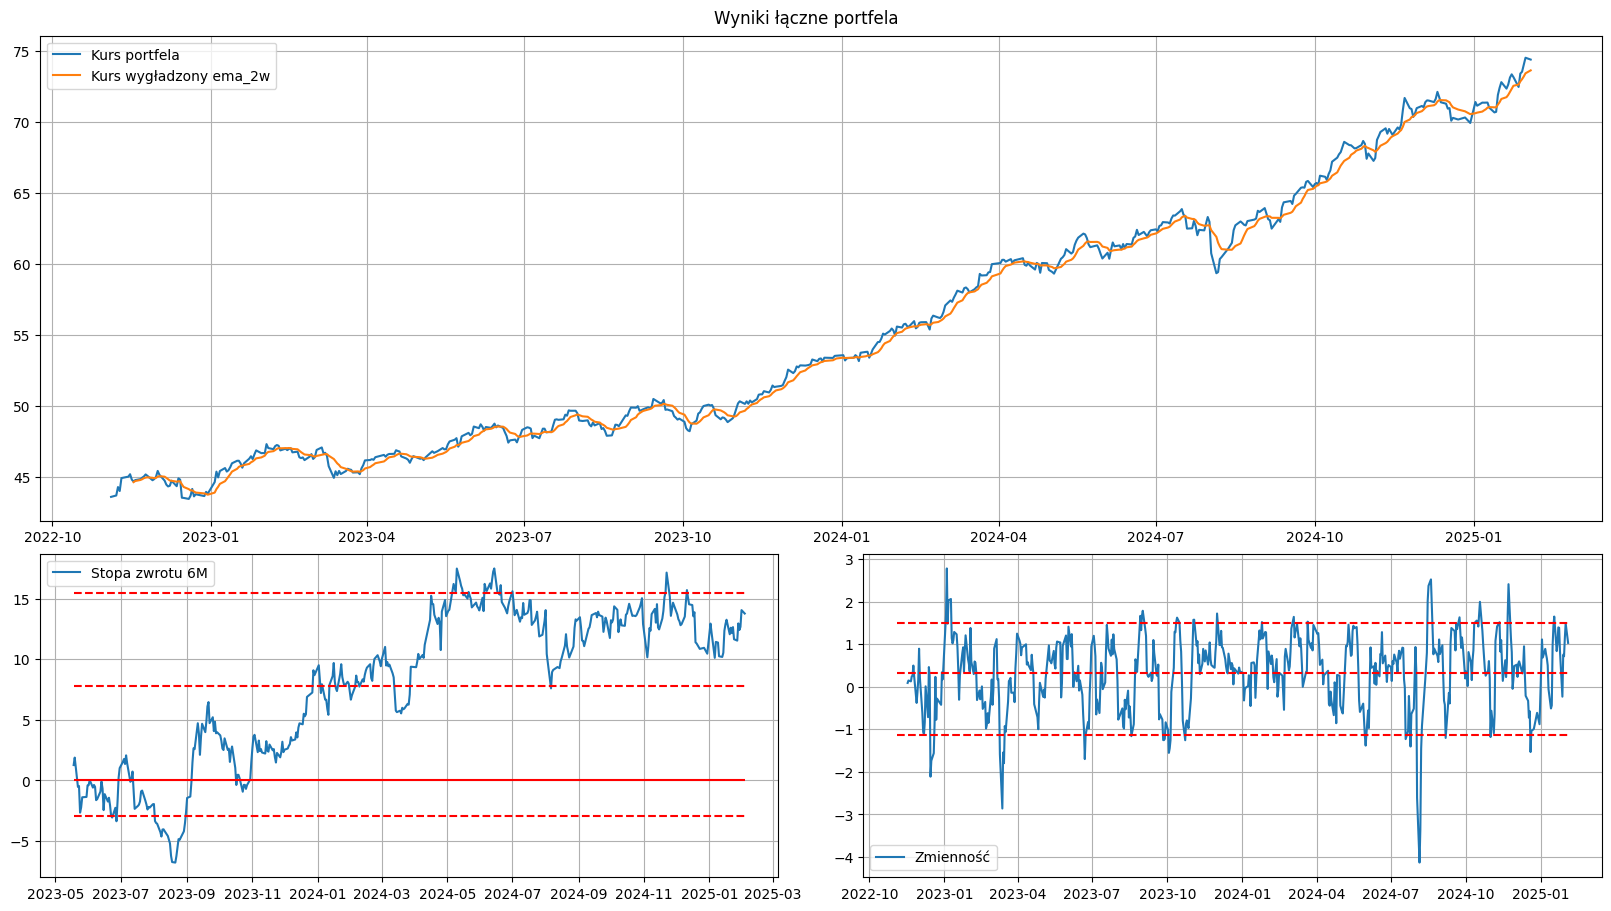

In [14]:
print(f"[INFO] Rozpoczynam pracę programu: {now(False)}")

pl = PortfolioLoader('pos1', 'Recommendations')
freq = '6M' # można to pobrać z obiektu 'pl' jako 'pl.freq', ale można też ustawić na inną wartość

# print()
# pl.getSummary()

print()
start, end = '2020-01-01', '2025-02-03'
dataloader = DataLoader(cfg.user_id, cfg.pwd)
data = dataloader.loadInstrumentsData(start, end)
info = dataloader.loadInstrumentsInfo()

datacleaner = DataCleaner(data, info, load_only=pl.symbols)
data = datacleaner.getBidPrice()
returnRates = datacleaner.getReturnRates(freq)

plotter = Plotter(pl.portfolio,
                  data,
                  returnRates,
                  freq,
                  pl.model,
                  pl.risk_method,
                  compare='ema_2w')
plotter.plot(show_instruments=False)

## Scenariusz 5. Wykres "Efficient Frontier"

In [3]:
start, end = '2024-01-01', '2025-02-03'

print(f"[INFO] Rozpoczynam pracę programu: {now(False)}")

dataloader = DataLoader(cfg.user_id, cfg.pwd)
data = dataloader.loadInstrumentsData(start, end)
info = dataloader.loadInstrumentsInfo()

datacleaner = DataCleaner(data, info)

[INFO] Rozpoczynam pracę programu: 2025-02-04 18:02:51
[INFO] Usuwanie instrumentów o wysokich kosztach obsługi.
	Aktualizacja danych...
	Pozostawiam 953 instrumentów.
[INFO] Usuwanie instrumentów o wysokich spreadach.
	Aktualizacja danych...
	Pozostawiam 953 instrumentów.
[INFO] Usuwanie instrumentów o dużych brakach w danych.
	Aktualizacja danych...
	Pozostawiam 908 instrumentów.
[INFO] Usuwanie instrumentów na podstawie ich zmienności.
	Aktualizacja danych...
	Pozostawiam 839 instrumentów.


In [4]:
freq = '3M'
returnRates = datacleaner.getReturnRates(freq)
ef = EfficientFrontierPlot(returnRates, freq, Npoints=80)

[INFO] Przygotowuję dane do wykresu...
	Pozostało 100.0%
	Pozostało 87.5%
	Pozostało 75.0%
	Pozostało 62.5%
	Pozostało 50.0%
	Pozostało 37.5%
	Pozostało 25.0%
	Pozostało 12.5%
[INFO] Wyznaczamy portfel 'max_sharpe'...
[INFO] Wyznaczamy portfele 'max_utility'...


[INFO] Generuję 5000 portfeli losowych...
	Pozostało 100.0%
	Pozostało 90.0%
	Pozostało 80.0%
	Pozostało 70.0%
	Pozostało 60.0%
	Pozostało 50.0%
	Pozostało 40.0%
	Pozostało 30.0%
	Pozostało 20.0%
	Pozostało 10.0%
[INFO] Rysuję wykres...


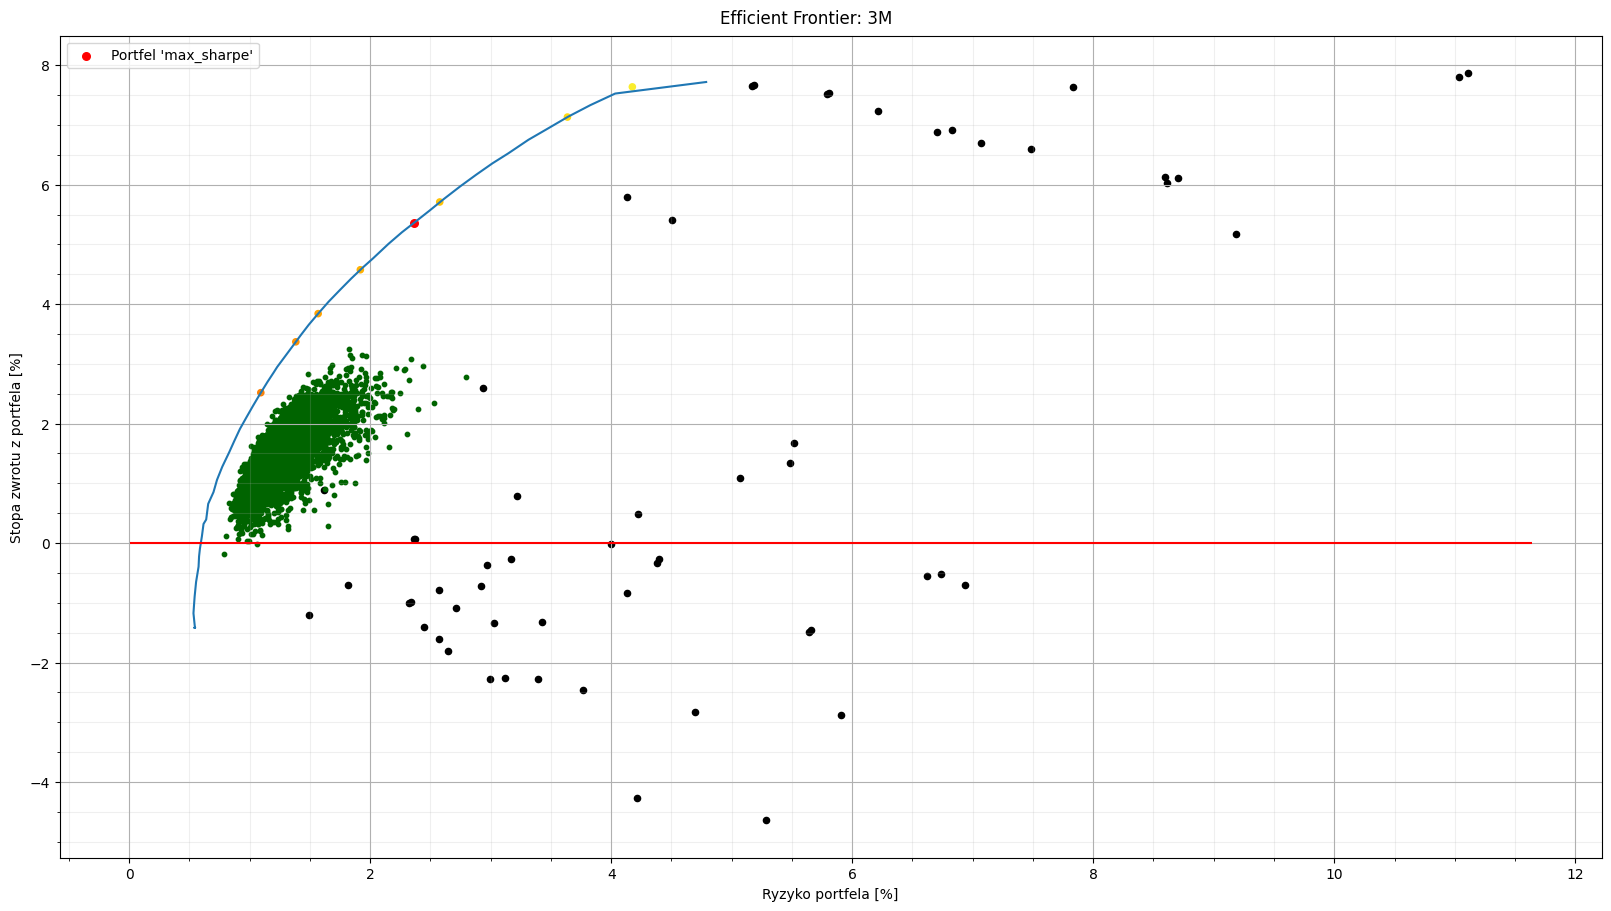

In [5]:
ef.plot(Nrandom=5000)

## Scenariusz 6: Backtest modelu

In [ ]:
start, end = '2015-12-31', '2025-02-03'

for freq in ['1M', '2M', '3M', '4M', '5M', '6M', '8M']:
    for len_train in [2, 3, 4, 5, 6]:
        print(f"[INFO] Backtest z freq = {freq}, len_train = {len_train}")

        bt = Backtest(start, end, freq, len_train)
        bt.runTrainTest()

        BacktestSummary = bt.summary
        SaveData(BacktestSummary, f'Backtest freq {freq} len_train {len_train}', 'Backtest')
        print()

[INFO] Backtest z freq = 2w, len_train = 2
[INFO] Okres 1 z 234. Pobieramy dane od 2016-01-03 do 2016-02-28: 2025-02-06 09:07:59
	[INFO] Trening w okresie od 2016-01-03 do 2016-02-14
	Oczekiwany zwrot treningowy: 2.63%
	Sharpe Ratio: 2.32

	[INFO] Test w okresie od 2016-02-14 do 2016-02-28
	Rzeczywisty zwrot w okresie testowym: 1.15%
	Treningowy przedział ufności: [1.10%, 4.04%]

[INFO] Okres 2 z 234. Pobieramy dane od 2016-01-17 do 2016-03-13: 2025-02-06 09:08:06
	[INFO] Trening w okresie od 2016-01-17 do 2016-02-28
	Oczekiwany zwrot treningowy: 5.03%
	Sharpe Ratio: 3.86

	[INFO] Test w okresie od 2016-02-28 do 2016-03-13
	Rzeczywisty zwrot w okresie testowym: 3.21%
	Treningowy przedział ufności: [3.21%, 6.83%]

[INFO] Okres 3 z 234. Pobieramy dane od 2016-01-31 do 2016-03-27: 2025-02-06 09:08:12
	[INFO] Trening w okresie od 2016-01-31 do 2016-03-13
	Oczekiwany zwrot treningowy: 2.17%
	Sharpe Ratio: 2.15

	[INFO] Test w okresie od 2016-03-13 do 2016-03-27
	Rzeczywisty zwrot w okresie 

In [85]:
BacktestSummary = bt.getSummary(success_threshold=1.5,
                                sharpe_threshold=1.5,
                                low_CI_threshold=2.0)
BacktestSummary[BacktestSummary['WasOpened'] == True]

,ExpectedReturn,ConfIntLow,ConfIntHigh,SharpeRatio,TrueReturn,Error,InConfInt,WasOpened,WasSuccessful
14,7.27,2.03,12.17,1.566721,3.86,-3.41,True,True,True
16,8.13,3.94,12.94,1.903706,3.68,-4.45,False,True,True
17,7.89,5.06,11.51,2.968551,6.34,-1.55,True,True,True
18,8.35,5.95,10.94,3.874467,7.55,-0.80,True,True,True
19,7.00,4.94,9.48,3.861391,4.91,-2.09,False,True,True
20,7.36,4.68,10.85,3.106225,4.82,-2.54,True,True,True
21,6.47,2.44,10.73,1.927123,9.76,3.29,True,True,True


In [79]:
TotalReturn = (1 + BacktestSummary['TrueReturn'][BacktestSummary['WasOpened']]/100).prod()
TotalReturn

2.439357644874335

### Próby budowania klasyfikatora do oceny jakości rekomendacji

In [80]:
df = BacktestSummary.iloc[:, [0, 1, 2, 3, -1]]
df

,ExpectedReturn,ConfIntLow,ConfIntHigh,SharpeRatio,WasSuccessful
1,5.25,1.42,8.74,1.662554,True
2,4.20,1.54,6.92,1.553900,True
3,4.50,1.95,7.68,1.699366,True
4,4.39,1.64,7.54,1.554237,True
5,3.65,-1.59,7.57,0.792818,False
6,4.23,-1.99,10.69,0.798773,False
7,5.89,-3.72,17.45,0.735415,False
8,2.67,-7.75,13.62,0.171172,False
9,5.45,-1.54,11.64,1.028234,False
10,3.97,-1.08,9.08,0.855387,False


In [81]:
from sklearn.linear_model import LogisticRegression as LR

len_test = 10
Xtrain, ytrain = df.iloc[:-len_test, :-1], df.iloc[:-len_test, -1]
Xtest, ytest = df.iloc[-len_test:, :-1], df.iloc[-len_test:, -1]

In [82]:
Xtest.join(ytest)

,ExpectedReturn,ConfIntLow,ConfIntHigh,SharpeRatio,WasSuccessful
22,6.92,0.62,13.60,1.380630,False
23,6.60,1.39,10.93,1.774664,True
24,5.72,0.91,11.16,1.332986,False
25,5.51,1.35,11.54,1.292993,False
26,5.17,0.12,11.24,1.135913,False
27,5.40,-2.18,10.90,1.089755,False
28,7.81,-1.00,16.82,1.142853,False
29,8.43,-1.34,16.72,1.213643,False
30,6.80,-0.69,12.28,1.382229,False
31,4.48,0.49,7.84,1.332242,False


In [83]:
model = LR()
fitted = model.fit(Xtrain, ytrain)
summary = {df.columns[i]: fitted.coef_[0][i] 
           for i in range(len(df.columns)-1)}

print(f"Skuteczność testowa: {model.score(Xtest, ytest):.2f}")
summary

Skuteczność testowa: 0.50


{'ExpectedReturn': 0.38617597997806724,
 'ConfIntLow': 1.4090344656132525,
 'ConfIntHigh': -0.08816914365866874,
 'SharpeRatio': 0.27286512985876893}

In [64]:
model.predict(Xtest)

array([ True,  True, False, False, False, False,  True])

# Brudnopis

In [20]:
bt = Backtest('2016-01-01', '2025-02-03', '6M', 2)
bt.summary = pd.read_csv('Backtest/Backtest freq 6M len_train 2.csv', index_col='Unnamed: 0')
bt.getSummary(sharpe_threshold=1.0)

,ExpectedReturn,ConfIntLow,ConfIntHigh,SharpeRatio,TrueReturn,Error,InConfInt,WasOpened,WasSuccessful
1,5.25,1.42,8.74,1.662554,1.23,-4.02,False,False,False
2,4.20,1.54,6.92,1.553900,2.69,-1.51,True,True,True
3,4.50,1.95,7.68,1.699366,4.82,0.32,True,True,True
4,4.39,1.64,7.54,1.554237,6.03,1.64,True,True,True
5,3.65,-1.59,7.57,0.792818,-3.05,-6.70,False,False,False
6,4.23,-1.99,10.69,0.798773,5.75,1.52,True,False,False
7,5.89,-3.72,17.45,0.735415,-0.70,-6.59,True,False,False
8,2.67,-7.75,13.62,0.171172,-1.43,-4.10,True,False,False
9,5.45,-1.54,11.64,1.028234,9.72,4.27,True,False,False
10,3.97,-1.08,9.08,0.855387,4.59,0.62,True,False,False


In [12]:
len_test = 5
Xtrain, ytrain = df.iloc[:-len_test, :-1], df.iloc[:-len_test, -1]
Xtest, ytest = df.iloc[-len_test:, :-1], df.iloc[-len_test:, -1]

In [18]:
from sklearn.linear_model import LinearRegression as LR
model = LR()
fitted = model.fit(Xtrain, ytrain)
fitted.intercept_

2.0169811473105987